# Problem Statement

* We have a dataset with Broad Food categories and the associated Nutrients present in each
* We have 25 different FoodGroups which need to be grouped based on the 45 Nutrients
* We eseentially need to reduce the dimensionality of our data

Dataset http://www.ars.usda.gov/Services/docs.htm?docid=8964 . This is from the SR27

In [2]:
# Import required packages 

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
df_org = pd.read_csv("food_nutrients.csv")

In [4]:
df_org.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [6]:
df_org.shape

(8618, 45)

In [9]:
df_org.isnull().sum()

ID                     0
FoodGroup              0
ShortDescrip           0
Descrip                0
CommonName          7555
MfgName             7058
ScientificName      7886
Energy_kcal            0
Protein_g              0
Fat_g                  0
Carb_g                 0
Sugar_g                0
Fiber_g                0
VitA_mcg               0
VitB6_mg               0
VitB12_mcg             0
VitC_mg                0
VitE_mg                0
Folate_mcg             0
Niacin_mg              0
Riboflavin_mg          0
Thiamin_mg             0
Calcium_mg             0
Copper_mcg             0
Iron_mg                0
Magnesium_mg           0
Manganese_mg           0
Phosphorus_mg          0
Selenium_mcg           0
Zinc_mg                0
VitA_USRDA             0
VitB6_USRDA            0
VitB12_USRDA           0
VitC_USRDA             0
VitE_USRDA             0
Folate_USRDA           0
Niacin_USRDA           0
Riboflavin_USRDA       0
Thiamin_USRDA          0
Calcium_USRDA          0


In [11]:
df_org.dtypes

ID                    int64
FoodGroup            object
ShortDescrip         object
Descrip              object
CommonName           object
MfgName              object
ScientificName       object
Energy_kcal         float64
Protein_g           float64
Fat_g               float64
Carb_g              float64
Sugar_g             float64
Fiber_g             float64
VitA_mcg            float64
VitB6_mg            float64
VitB12_mcg          float64
VitC_mg             float64
VitE_mg             float64
Folate_mcg          float64
Niacin_mg           float64
Riboflavin_mg       float64
Thiamin_mg          float64
Calcium_mg          float64
Copper_mcg          float64
Iron_mg             float64
Magnesium_mg        float64
Manganese_mg        float64
Phosphorus_mg       float64
Selenium_mcg        float64
Zinc_mg             float64
VitA_USRDA          float64
VitB6_USRDA         float64
VitB12_USRDA        float64
VitC_USRDA          float64
VitE_USRDA          float64
Folate_USRDA        

In [7]:
print(df_org.FoodGroup.unique())
print(len(df_org.FoodGroup.unique()))

['Dairy and Egg Products' 'Spices and Herbs' 'Baby Foods' 'Fats and Oils'
 'Poultry Products' 'Soups, Sauces, and Gravies'
 'Sausages and Luncheon Meats' 'Breakfast Cereals' 'Snacks'
 'Fruits and Fruit Juices' 'Pork Products'
 'Vegetables and Vegetable Products' 'Nut and Seed Products'
 'Beef Products' 'Beverages' 'Finfish and Shellfish Products'
 'Legumes and Legume Products' 'Lamb, Veal, and Game Products'
 'Baked Products' 'Sweets' 'Cereal Grains and Pasta' 'Fast Foods'
 'Meals, Entrees, and Side Dishes' 'American Indian/Alaska Native Foods'
 'Restaurant Foods']
25


In [15]:
# Dataframe with only numeric features

df_num = df_org.iloc[:,7:46]
print(df_num.shape)
print(df_num.head())

(8618, 38)
   Energy_kcal  Protein_g  Fat_g  Carb_g  Sugar_g  Fiber_g  VitA_mcg  \
0        717.0       0.85  81.11    0.06     0.06      0.0     684.0   
1        717.0       0.85  81.11    0.06     0.06      0.0     684.0   
2        876.0       0.28  99.48    0.00     0.00      0.0     840.0   
3        353.0      21.40  28.74    2.34     0.50      0.0     198.0   
4        371.0      23.24  29.68    2.79     0.51      0.0     292.0   

   VitB6_mg  VitB12_mcg  VitC_mg     ...      Folate_USRDA  Niacin_USRDA  \
0     0.003        0.17      0.0     ...            0.0075      0.002625   
1     0.003        0.13      0.0     ...            0.0075      0.002625   
2     0.001        0.01      0.0     ...            0.0000      0.000188   
3     0.166        1.22      0.0     ...            0.0900      0.063500   
4     0.065        1.26      0.0     ...            0.0500      0.007375   

   Riboflavin_USRDA  Thiamin_USRDA  Calcium_USRDA  Copper_USRDA  \
0          0.026154       0.0041

### Correlation plot

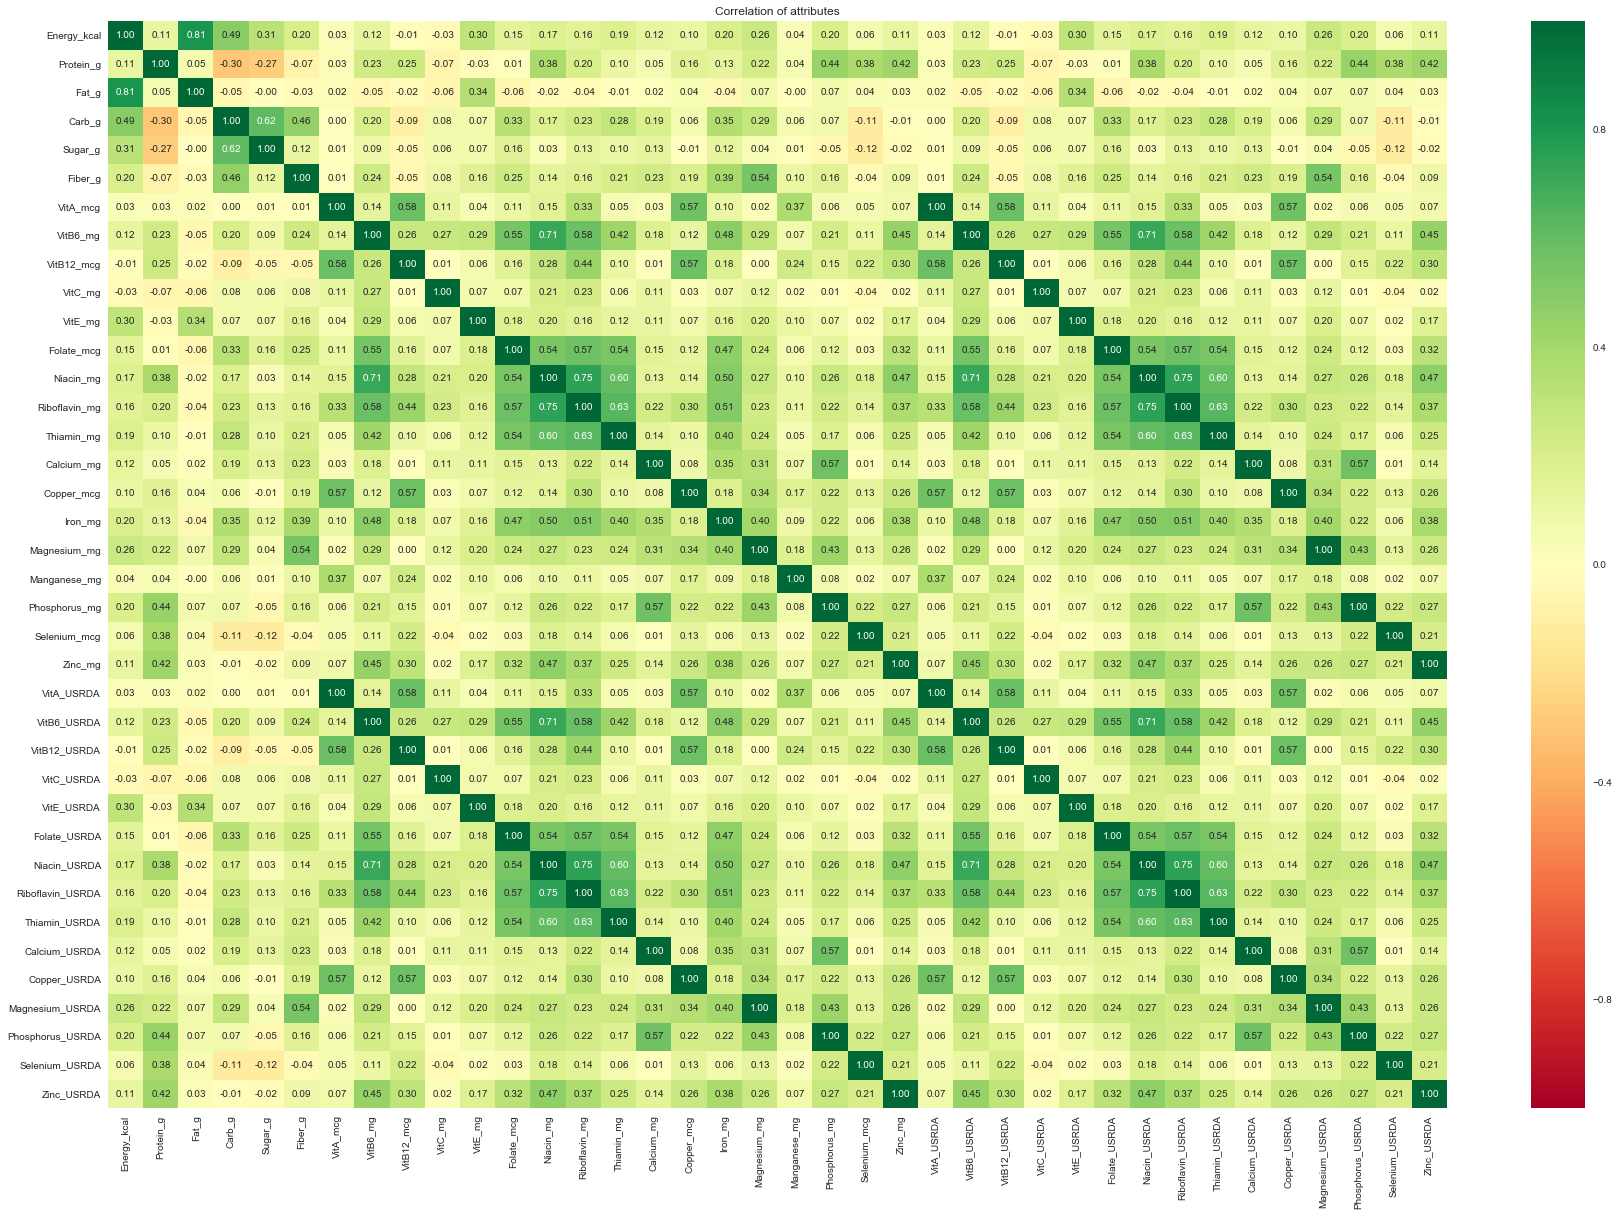

In [19]:
from scipy.stats import pearsonr as pr
import seaborn as sns

% matplotlib inline

# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(30,20))

# Add the plot title
plt.title('Correlation of attributes')

# Plot the heatmap
sns.heatmap(data= df_num.corr(), annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

### Observations from Correlation Plot

* We can see that the "_USRDA" features are redundant. We can remove them
* Carb, Sugar and Fiber have a high correlation so we will keep just Carb

In [20]:
df_num_bck = df_num

In [21]:
df_num.drop(df_num.columns[df_num.columns.str.contains('_USRDA')].values, 
        inplace=True, axis=1)

In [24]:
df_num.drop(['Sugar_g', 'Fiber_g'], inplace=True, axis=1)

In [27]:
df_num.drop(['Iron_mg'], inplace=True, axis=1)

In [28]:
df_num.shape

(8618, 20)

In [30]:
# Checking for NaNs
df_num.isnull().sum().sum()

0

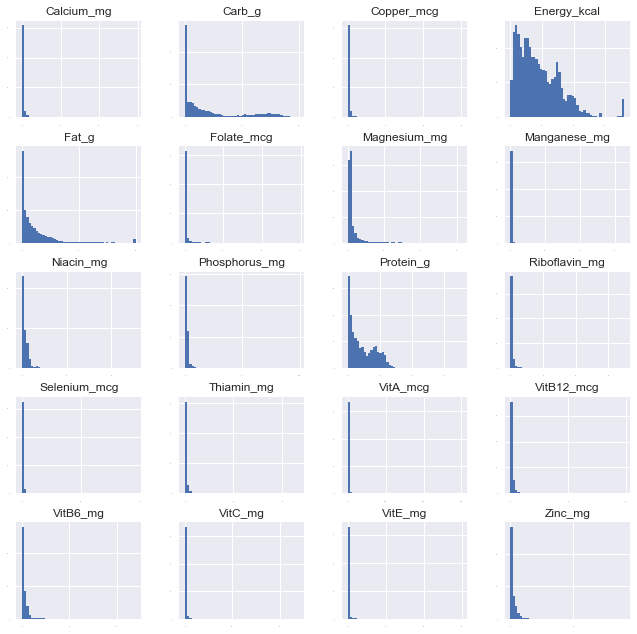

In [29]:
## Explore Data Distributions

ax = df_num.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(11,11))

In [ ]:
# We see that all data is right skewed and many values are zeros

In [31]:
from scipy.stats import boxcox

# add 1 because data must be positive (we have many zeros)
# Applying Boxcox Transformation

df_num = df_num + 1
df_TF = pd.DataFrame(index=df_num.index)
for i in df_num.columns.values:
    df_TF["%s_TF" % i] = boxcox(df_num.loc[:, i])[0]

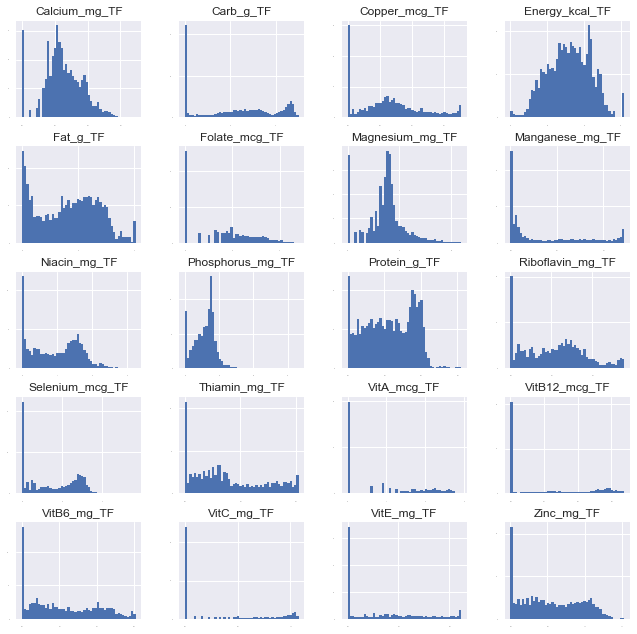

In [32]:
ax = df_TF.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(11,11))

In [34]:
# Standardize data now

# from sklearn.preprocessing import StandardScaler
df_TF = StandardScaler().fit_transform(df_TF)

print ("mean:", np.round(df_TF.mean(), 2))
print ("standard dev: ", np.round(df_TF.std(), 2))

mean: -0.0
standard dev:  1.0


### PCA Implementation

In [35]:
fit = PCA()
pca = fit.fit_transform(df_TF)

#check the eigenvalues to find most important components

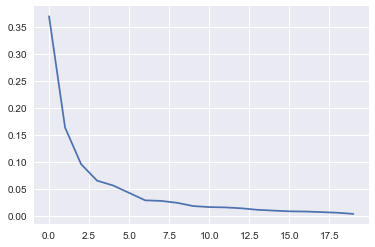

In [36]:
plt.plot(fit.explained_variance_ratio_)

#### Observations from PCA

* The inflection point is 5 , which means that ideal # Components for PCA is 5
* Variance explained by first 5 components is 75%

In [38]:
print (fit.explained_variance_ratio_)
print (fit.explained_variance_ratio_[:5].sum())

[ 0.36940696  0.1637238   0.09608533  0.06559027  0.05664203  0.04303649
  0.02921512  0.02815711  0.0246494   0.01861053  0.01678351  0.01615258
  0.01452145  0.01175351  0.01025006  0.00892508  0.00854669  0.0074923
  0.00633871  0.00411906]
0.751448395198


In [42]:
pca.head()

,0,1,2,3,4
0,-2.301064,-1.222982,1.679304,4.369706,-0.663555
1,-2.289360,-1.083342,1.699714,4.319164,-0.791524
2,-3.454539,-1.761319,2.361583,4.430622,-0.575174
3,2.376444,-0.777307,-0.241750,2.234580,-0.160550
4,1.891822,-0.769018,-0.053664,2.542638,-0.539832


In [ ]:
pca = pd.DataFrame(pca[:, :5], index=df_org.index)
pca = pca.join(df_org)
#pca.drop(['CommonName','MfgName','ScientificName'], axis=1, inplace=True)
#pca.rename(columns={0:'c1',1:'c2',2:'c3',3:'c4',4:'c5'}, inplace=True)


## CHK GOT ERROR - Chk sample code in same folder

In [44]:
# Check for orthogonality of Features from PCA
np.round(pca.corr(), 5)

,0,1,2,3,4
0,1.0,-0.0,-0.0,-0.0,-0.0
1,-0.0,1.0,0.0,0.0,0.0
2,-0.0,0.0,1.0,0.0,-0.0
3,-0.0,0.0,0.0,1.0,-0.0
4,-0.0,0.0,-0.0,-0.0,1.0


### First Component 
Foods that are 
High in: zinc, and other vitamins and minerals

Low in: sugar, vitamin C, Carbs, and fiber

In [45]:
vects = fit.components_[:5]

one = pd.Series(vects[0], index=df_num.columns)
one.sort_values(ascending=False)

Zinc_mg          0.319459
Phosphorus_mg    0.318592
Niacin_mg        0.303328
Protein_g        0.295935
Riboflavin_mg    0.292323
VitB6_mg         0.281811
Selenium_mcg     0.279212
Magnesium_mg     0.269880
Thiamin_mg       0.241070
VitB12_mcg       0.232857
Copper_mcg       0.226695
Folate_mcg       0.174312
Energy_kcal      0.170786
Fat_g            0.169243
Calcium_mg       0.141806
VitE_mg          0.101171
Manganese_mg     0.089191
VitA_mcg         0.064568
Carb_g          -0.038206
VitC_mg         -0.073099
dtype: float64

### Second Component 

High: Carbs, Fiber, Mang, Sugar, Vitamin C...

Low: Vitamine B12, protein, selenium, Fat...

In [49]:
second = pd.Series(vects[1], index=df_num.columns)
second.sort_values(ascending=False)

Manganese_mg     0.421247
Carb_g           0.392307
Folate_mcg       0.323988
VitC_mg          0.320483
Calcium_mg       0.279674
Copper_mcg       0.253315
Magnesium_mg     0.244011
VitA_mcg         0.165217
Thiamin_mg       0.132045
VitE_mg          0.114034
Phosphorus_mg    0.007645
Riboflavin_mg    0.005523
Energy_kcal     -0.035249
VitB6_mg        -0.049744
Niacin_mg       -0.093346
Zinc_mg         -0.102486
Selenium_mcg    -0.116074
Fat_g           -0.194215
Protein_g       -0.218771
VitB12_mcg      -0.281475
dtype: float64

### Third Component 

High: calories, fat, carbs, sugar...

Low: vitamin A, vitamin C, folate, copper...

In [51]:
third = pd.Series(vects[2], index=df_num.columns)
third.sort_values(ascending=False)

Energy_kcal      0.565979
Fat_g            0.417296
Carb_g           0.369395
Thiamin_mg       0.224970
Manganese_mg     0.078955
Riboflavin_mg    0.034082
VitE_mg          0.024580
Phosphorus_mg    0.009413
Niacin_mg        0.001308
Magnesium_mg    -0.006653
Protein_g       -0.031246
Calcium_mg      -0.044471
Copper_mcg      -0.059429
Zinc_mg         -0.086562
Selenium_mcg    -0.151678
Folate_mcg      -0.156283
VitB6_mg        -0.179575
VitB12_mcg      -0.236153
VitA_mcg        -0.276663
VitC_mg         -0.290457
dtype: float64

### Fourth Component 

High: vitamin A, vitamin E, fat, sugar, calcium, vitamin B12, calories...

Low: manganese, copper, iron, magnesium, fiber

In [53]:
fourth = pd.Series(vects[3], index=df_num.columns)
fourth.sort_values(ascending=False)

VitE_mg          0.591211
VitA_mcg         0.552120
Fat_g            0.352867
Energy_kcal      0.193751
Calcium_mg       0.176294
VitB12_mcg       0.110271
VitC_mg          0.091881
Selenium_mcg     0.061592
Folate_mcg       0.018574
Riboflavin_mg   -0.033884
Phosphorus_mg   -0.044738
Zinc_mg         -0.073144
Carb_g          -0.073520
VitB6_mg        -0.078671
Protein_g       -0.092453
Copper_mcg      -0.126222
Niacin_mg       -0.134176
Magnesium_mg    -0.134448
Manganese_mg    -0.136768
Thiamin_mg      -0.168521
dtype: float64

In [ ]:
### Fifth Component 

High: riboflavin, thiamin, niacin, sugar, vitB6, vitC, vitB12...

Low: manganese, copper, fat, vitE, calories, magnesium

In [54]:
fifth = pd.Series(vects[4], index=df_num.columns)
fifth.sort_values(ascending=False)

Thiamin_mg       0.402247
Riboflavin_mg    0.387550
VitC_mg          0.287939
Niacin_mg        0.260599
Carb_g           0.238795
VitB6_mg         0.210498
VitA_mcg         0.207191
VitB12_mcg       0.118022
Calcium_mg       0.037719
Energy_kcal     -0.002757
Folate_mcg      -0.074225
Fat_g           -0.088006
Phosphorus_mg   -0.092904
Zinc_mg         -0.121668
Protein_g       -0.123450
Magnesium_mg    -0.157243
VitE_mg         -0.163369
Selenium_mcg    -0.223800
Manganese_mg    -0.298683
Copper_mcg      -0.367316
dtype: float64

## Which category foods are high in what?

* Using PCA output, we can do further analysis based on food categories